# Poissonligningen

## 1. Poissonligningen

La oss begynne med ligningen i en dimensjon, dvs

$$
u_{xx} = f(x)
$$

Vi kan løse ligningen ved å integrere to ganger.

### Eksempel

Hvis $f(x)=0$ har vi 
$$
u_x = \int f(x) dx = A\text{ og }u_{xx} = \int u_x dx = Ax + B,
$$ 
hvor konstantene $A$ og $B$ bestemmes ut fra randbetingelsene.

Ting blir fort mer komplisert i flere dimensjoner. 

### Randbetingelser

Ligningen 

$$
\Delta u(\vec{x}) = f(\vec{x}), \quad \vec{x}\in \Omega
$$ 

kommer typisk med randbetingelser:

1. dirichletbetingelser

$$u(\vec{x}) = g(\vec{x}), \quad \vec{x}\in \partial \Omega$$

hvor $\partial\Omega$ er randen på området $\Omega$ og hvor vi oppgir løsningen på randen.

2. neumannbetingelser

$$ \frac{\partial u}{\partial \vec{n}}(\vec{x}) = g(\vec{x}), \quad \vec{x}\in \partial \Omega$$

Hvor $\vec{n}$ er normalvektoren på randen. Altså, vi oppgir retningsderiverte til $u$ i retning ut av området $\Omega$.

Det er mulig å kombinere de to, enten med å oppgi dirichletbetingelser på noen deler av randen og neumannbetingelser på andre, eller med å si at summen av $u$ og $\frac{\partial u}{\partial \vec{n}}$ er lik en oppgitt funksjon. Sistnevnte kalles for en *robinbetingelse*, men vi skal ikke se på denne muligheten, selv om den ikke skaper utfordringer.

### Løsninger (ikke pensum)

Er geometrien pen nok kan vi fortsatt skrive løsningen som et integral. For eksempel, ligningen på enhetsdisken:

$$
u_{xx} + u_{yy} = f(x,y), \quad x^2 + y^2 < 1, \qquad u(x,y)=0, \quad x^2+ y^2 = 1
$$

har følgende løsning:

$$
u(\vec{x}) = \frac{1}{2\pi}\int_{||\vec{y}||\leq 1} \frac{f(\vec{y})d\vec{y}}{\log||\vec{x}-\vec{y}|| -\log||\frac{\vec{x}}{||\vec{x}||^2}-\vec{y}||}
$$

Deilig! Vi har bare noen få problemer:

1. Integralet er ikke så lett å løse
2. Vi må finne et nytt integral hvis vi endrer geometrien av randbetingelsene
3. For noen geometrier er det nesten like vanskelig å finne et slikt integral som å løse ligningen. 

### Eksempel:

Det kan vises at ligningen

$$
u_{xx}(x,y) + u_{yy}(x,y) = 0, \quad 0<x<1,\;\; 0<y<1
$$

med randbetingelser $u(x,0)=u(0,y)=u(1,y)=0$, $u(x,1)=\sin(\pi x)$ har løsning

$$
u(x,y) = \frac{\sin(\pi x)\sinh(\pi y)}{\sinh(\pi)}
$$

Her kan geometrien fortsett skape vanskeligheter, men i mindre grad.

## 2. Numeriske metode: 1d randverdiproblem

La oss nå betrakte den ordinære differensialligningen

$$
u_{tt} + \omega^2 u = f(x), \quad u(0) = a,\;\; u(1) = b.
$$

Det blir det samme som en poissonligning i 1 dimensjon hvis vi har $\omega=0$.

Vi lært i PNS/matte 1 at vi kan løse ligningen ved å skrive det om som en $2\times 2$ førsteordensligning. Men det blir litt vrient, da vi ender opp med randbetingelser på begge sider, så det er ikke hva vi gjør her.

### Utregning av $u_{tt}$

Strategien vi bruker her er å benytte Taylors teorem til å skrive:

$$
u_{tt} \approx \frac{1}{h^2} (u(t+h) - 2u(t) + u(t-h)) 
$$

Merk at formelen kun gjelder for $0<t<1$, og ikke på randen der $t=0$ eller $t=1$. 
Vi skal løse problemet numerisk ved å diskretisere og finne verdiene $u_i$ for $i=1,\cdots,m$. I tillegg kommer randbetingelsene $u_0=a$ og $u_{m+1}=b$.

Konsekvensen er at etter diskretisering, så er utregning av den andrederiverte gitt ved den lineære avbildningen $L$:

$$
L: u_n \mapsto \frac{u_{n+1}-2u_n+u_{n-1}}{h^2}
$$

for $n=1,\cdots, m$ (vi har også randverdiene).  Som lineær avbildning kan den beskrives med en $m\times m$-matrise, lik

$$
L = \frac{1}{h^2}
\begin{pmatrix}
-2 & 1 & 0  & \ldots & 0 & 0\\
1 & -2 & 1  & \ldots & 0 & 0\\
0 & 1 & -2  & \ldots & 0 & 0\\
\vdots & \vdots & \vdots &  & \vdots & \vdots \\
0 & 0 & 0 & \ldots  & -2 & 1 \\
0 & 0 & 0 & \ldots  & 1 & -2
\end{pmatrix}
$$

Nok en gang er det litt uklart hva som skjer ved randen. Vi skal se på det litt lenger ned i teksten, men først viser vi hvordan vi lager matrisen $L$
i Python.

### a) Programmering 1: en hurtigløsning

Vi lager vi matrisen $L$. Det viser seg å være forbausende lett!

In [1]:
import numpy as np

# antall punkter langs x-aksen, vi legger til endepunktene
m = 4
x = np.linspace(0,1,m+2)
h = x[1] - x[0]

# Vi lager matrisen L
L = (1/h**2)*(np.diag((m-1)*[1], -1) + np.diag((m)*[-2],0) + np.diag((m-1)*[1],1))

print(L)


[[-50.  25.   0.   0.]
 [ 25. -50.  25.   0.]
 [  0.  25. -50.  25.]
 [  0.   0.  25. -50.]]


### b) Programmering 2: et alternativ

Vi kunne imidlertidig også ha satt opp matrisen med for-løkke:

In [2]:
# initialiserer matrisen
L_for = np.zeros((m,m))

# løkka, går fra i=0 til i=m-2
for i in np.arange(m-1):
    L_for[i,i+1] = 1
    L_for[i+1,i] = 1
    L_for[i,i] = -2

# vi savner den siste -2 nederst til høyre
L_for[-1,-1] = -2

# del på h^2
L_for = L_for/(h**2)

print(L_for)

[[-50.  25.   0.   0.]
 [ 25. -50.  25.   0.]
 [  0.  25. -50.  25.]
 [  0.   0.  25. -50.]]


## 3. Randbetingelsene 1: Dirichlet

Nå ser vi på hvordan randbetingelsene påvirker det som skjer ved randen. Vi ser altså på ligningen 

$$
u_{tt} + \omega^2 u = f(x), \quad u(0) = a, \; \; u(1) = b.
$$

Vi ser på tilfellet hvor $f(x)=0$ først.  La $u_n = u(x_n)$. Vi må legge inn $u_0 = u(0) = a$ og $u_{m+1} = u(1) = b$. Legg merke til at den første ligningen burde egentlig ha vært

$$
\frac{u_0 - 2u_1 + u_2}{h^2} + \omega^2 u_1 = 0
$$

Men den første linjen til $(L + \omega^2)\vec{u}=L\vec{u} + \omega^2 \vec{u}$ er lik

$$
\frac{- 2u_1 + u_2}{h^2} + \omega^2 u_1 = 0
$$

Vi må altså flytte $u_0$ til den andre siden og får

$$
\frac{- 2u_1 + u_2}{h^2} + \omega^2 u_1 = \frac{u_0}{h^2} = -\frac{a}{h^2}
$$

Vi gjør det samme med den siste ligningen i $(L + \omega^2) \vec{u} = 0$. Vi ender da opp med

$$
(L + \omega^2) \vec{u} = \vec{F}, \quad
\vec{F} = \begin{pmatrix}
-\frac{a}{h^2} \\
0 \\
\vdots \\
0 \\
-\frac{b}{h^2}
\end{pmatrix}
$$

Hvis $f(x)$ ikke er $0$, så må vi først regne $\vec{F} = f(x)$. Vi legger en kommentar i koden under for å vise hvordan dette kan gjøre i praksis.

In [3]:
import numpy.linalg as la

omega = 1
a = -1
b = 1

# vi lager ligningssystemet Ax = F
A = L + (omega**2) * np.eye(m)
# Erstatt linjen under med f.eks. F = np.sin(x) hvis f(x) ikke er 0
F = np.zeros(m)  # i eksemplet her er f(x)=0
F[0] = F[0] - a/(h**2)
F[-1] = F[-1] - b/(h**2)

# vi løser og skriver ut løsningen
U = la.solve(A,F)
print(U)

[-0.61646118 -0.20826391  0.20826391  0.61646118]


### Test

Så langt har vi bare prøvd små verdier for $m$, for å illustrere prosessen. Vi prøver nå med større verdier, på ligningen 

$$
\frac{d^2 u}{dx^2} + \pi^2 u = 0, \quad u(0) = -1,\;\; u(1) = 1.
$$

Den generelle løsningen er   
$$
u = A\sin\pi x + B\cos\pi x,
$$

Vi har $u(0)=B$ og $u(1)=-B$, slik at den eksakte løsningen blir

$$
u = - \cos\pi x
$$

Vi løser dette numerisk.

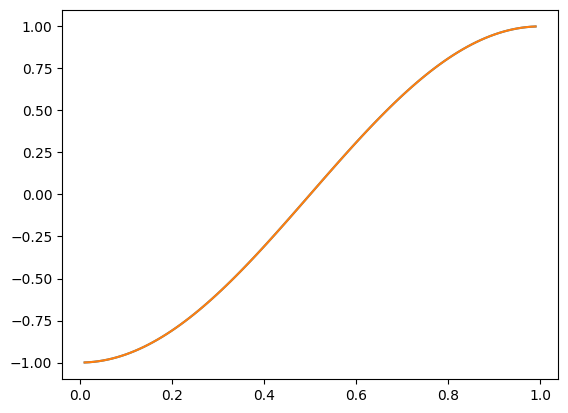

In [4]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# Vi setter opp og løser problemet som i eksemplet over
omega = np.pi
a = -1
b = 1
m = 100
x = np.linspace(0,1,m+2)
h = x[1] - x[0]
L = (1/h**2)*(np.diag((m-1)*[1], -1) + np.diag(m*[-2],0) + np.diag((m-1)*[1],1))
A = L + (omega**2) * np.eye(m)
F = np.zeros(m)  # erstattes med F = f(x) hvis f(x) ikke er 0
F[0] = F[0]-a/(h**2)
F[-1] = F[-1]-b/(h**2)

# vi finner den numeriske løsningen og plotter denne
U = la.solve(A,F)
plt.plot(x[1:-1],U)  # vi plotter ikke randbetingelsen, derfor x[1:-1]

# vi finner eksakte løsningen og plotter denne
U_analytisk = - np.cos(omega*x[1:-1])  
plt.plot(x[1:-1],U_analytisk)  

# Hvis alt gikk bra så ser du bare en kurve, da de to kurvene følger hverandre nøyaktig.